In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

import warnings

warnings.filterwarnings("ignore");

In [7]:
def Fill (df, s): 
    si = SimpleImputer(strategy='constant', fill_value='0')
    a = si.fit_transform(df[[s]])
    l = []
    for i in range(len(a)): l.append(a[i][0])
    return l

def Fill_2 (df, s): 
    si = SimpleImputer(strategy='constant', fill_value=0)
    a = si.fit_transform(df[[s]])
    l = []
    for i in range(len(a)): l.append(a[i][0])
    return l

In [8]:
df = pd.read_csv("archive2/pancreatic_cancer.csv")

le = LabelEncoder();

# df["patient_cohort"] = df["patient_cohort"].map({"Cohort1": 0, "Cohort2": 1})
# df["sex"] = df["sex"].map({"M": 1, "F": 0})
# df["sample_origin"] = df["sample_origin"].map({"LIV": 0, "ESP": 1, "BPTB": 2, "UCL": 3})

df.diagnosis = df.diagnosis == 3

df.patient_cohort = le.fit_transform(df.patient_cohort)
df.sex = le.fit_transform(df.sex)
df.sample_origin = le.fit_transform(df.sample_origin)
df.diagnosis = le.fit_transform(df.diagnosis)

df["stage"] = Fill(df, "stage");
df["benign_sample_diagnosis"] = Fill(df, "benign_sample_diagnosis");
df["REG1A"] = Fill_2(df, "REG1A");
df["plasma_CA19_9"] = Fill_2(df, "plasma_CA19_9");

df = df.drop(["age", "sample_id"], axis=1)

df

,patient_cohort,sample_origin,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,0,0,0,0,0,0,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,0,0,0,0,0,0,0.0,0.97266,2.037585,94.467030,209.488250,228.407
2,1,0,1,0,0,0,7.0,0.78039,0.145589,102.366000,461.141000,0.000
3,1,0,1,0,0,0,8.0,0.70122,0.002805,60.579000,142.950000,0.000
4,1,0,1,0,0,0,9.0,0.21489,0.000860,65.540000,41.088000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
585,1,0,1,1,IV,0,0.0,0.52026,7.058209,156.241000,525.178000,0.000
586,1,0,0,1,IV,0,0.0,0.85956,8.341207,16.915000,245.947000,0.000
587,1,0,1,1,IV,0,0.0,1.36851,7.674707,289.701000,537.286000,0.000
588,1,0,0,1,IV,0,0.0,1.33458,8.206777,205.930000,722.523000,0.000


In [9]:
_stage = ["0", "IA", "IB", "I", "IIA", "IIB", "II", "III", "IV"]
oe = OrdinalEncoder(categories=[_stage])
df["stage"] = oe.fit_transform(df[["stage"]])

df["stage"].value_counts()

stage
0.0    391
7.0     76
5.0     68
8.0     21
2.0     12
4.0     11
6.0      7
1.0      3
3.0      1
Name: count, dtype: int64

In [10]:
df = df.drop(["benign_sample_diagnosis", "stage"], axis=1)


In [11]:
dx = df.drop(["diagnosis"], axis=1)
dy = df["diagnosis"]

#### KMeans

In [12]:
kmeans = KMeans(n_clusters=2, random_state=42)
km_fit = kmeans.fit(dx)

In [14]:
silhouette_avg = silhouette_score(dx, km_fit.labels_)

In [15]:
print(f"silhouette_avg: {silhouette_avg:.6f}")

silhouette_avg: 0.894271


#### AgglomerativeClustering

In [17]:
hclust = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')

In [18]:
hclust_fit = hclust.fit(dx)
hclust_labels = hclust_fit.labels_

In [19]:
hclust_silhouette_avg = silhouette_score(dx, hclust_labels)
print(f"hclust_silhouette_avg: {hclust_silhouette_avg:.6f}")

hclust_silhouette_avg: 0.894271


#### Dendrogram

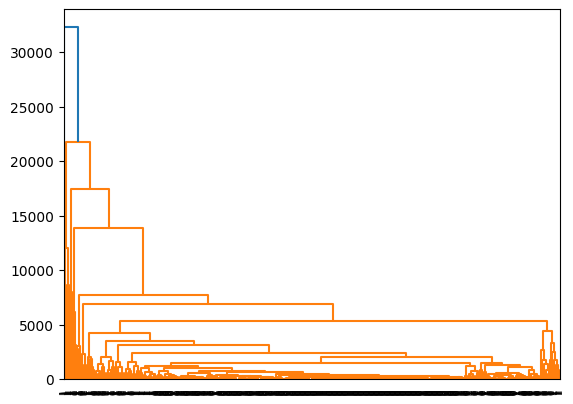

In [22]:
mergings = linkage(dx, method='complete')

dendrogram(mergings, labels=dy.values, leaf_rotation=90, leaf_font_size=6)
plt.show()

#### DBSCAN & PCA

In [30]:
dbscan = DBSCAN()
dbscan.fit(dx)

DBSCAN()

In [31]:
pca = PCA(n_components=2).fit(dx)
pca_2d = pca.transform(dx)

{-1}


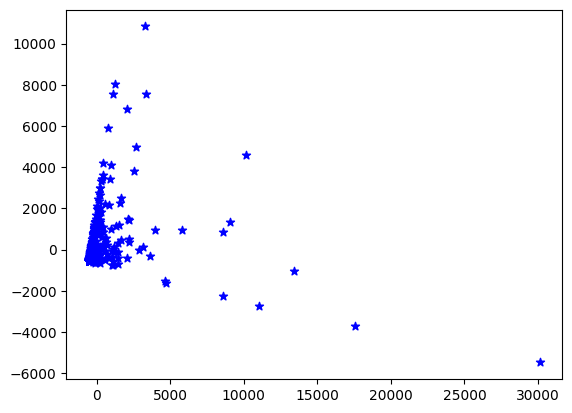

In [33]:
rng: range = range(0, pca_2d.shape[0])

dbg: list = [];

for i in rng: 
    dbg.append(dbscan.labels_[i])
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

print(set(dbg))
# plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
# plt.title('DBSCAN finds 2 clusters and Noise')
# plt.show()